In [29]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%qtconsole

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY, USE_LIKELIHOODS, BRAIN_AREAS

epoch_key = ('bon', 3, 4)

In [4]:
import itertools
from src.load_data import load_data

speed_metric='linear_speed'

data_types = set(itertools.chain(*USE_LIKELIHOODS.values()))
data = load_data(epoch_key, ANIMALS, SAMPLING_FREQUENCY,
                 BRAIN_AREAS, speed_metric)

INFO:src.load_data:Loading Data...
INFO:spectral_connectivity.transforms:Multitaper(sampling_frequency=1500, time_halfbandwidth_product=1,
           time_window_duration=0.02, time_window_step=0.02,
           detrend_type='constant', start_time=5609.019833332, n_tapers=1)
INFO:src.load_data:Finding multiunit high synchrony events...
INFO:src.load_data:Finding ripple times...


In [5]:
from replay_identification import ReplayDetector

position_metric = 'linear_position2'

replay_detector = ReplayDetector(spike_model_knot_spacing=15, place_bin_size=2.0, replay_speed=200)
replay_detector.fit(
    is_replay=data['is_ripple'], speed=data['position_info'][speed_metric],
    position=data['position_info'][position_metric], spikes=data['spikes'])

INFO:replay_identification.decoders:Fitting speed model...
INFO:replay_identification.decoders:Fitting spiking model...


INFO:replay_identification.decoders:Fitting movement state transition...
INFO:replay_identification.decoders:Fitting replay state transition...


ReplayDetector(is_track_interior=None,
        lfp_model=<class 'sklearn.mixture.bayesian_mixture.BayesianGaussianMixture'>,
        lfp_model_kwargs={'n_components': 10, 'max_iter': 200, 'tol': 1e-06},
        movement_state_transition_type='empirical', movement_std=0.05,
        multiunit_density_model=<class 'sklearn.mixture.bayesian_mixture.BayesianGaussianMixture'>,
        multiunit_model_kwargs={'n_components': 30, 'max_iter': 200, 'tol': 1e-06},
        multiunit_occupancy_kwargs={'bandwidth': 2},
        multiunit_occupancy_model=<class 'sklearn.neighbors.kde.KernelDensity'>,
        n_place_bins=None, place_bin_size=2.0, replay_speed=200,
        replay_state_transition_penalty=1e-05, speed_knots=None,
        speed_threshold=4.0, spike_model_knot_spacing=15,
        spike_model_penalty=0.1)

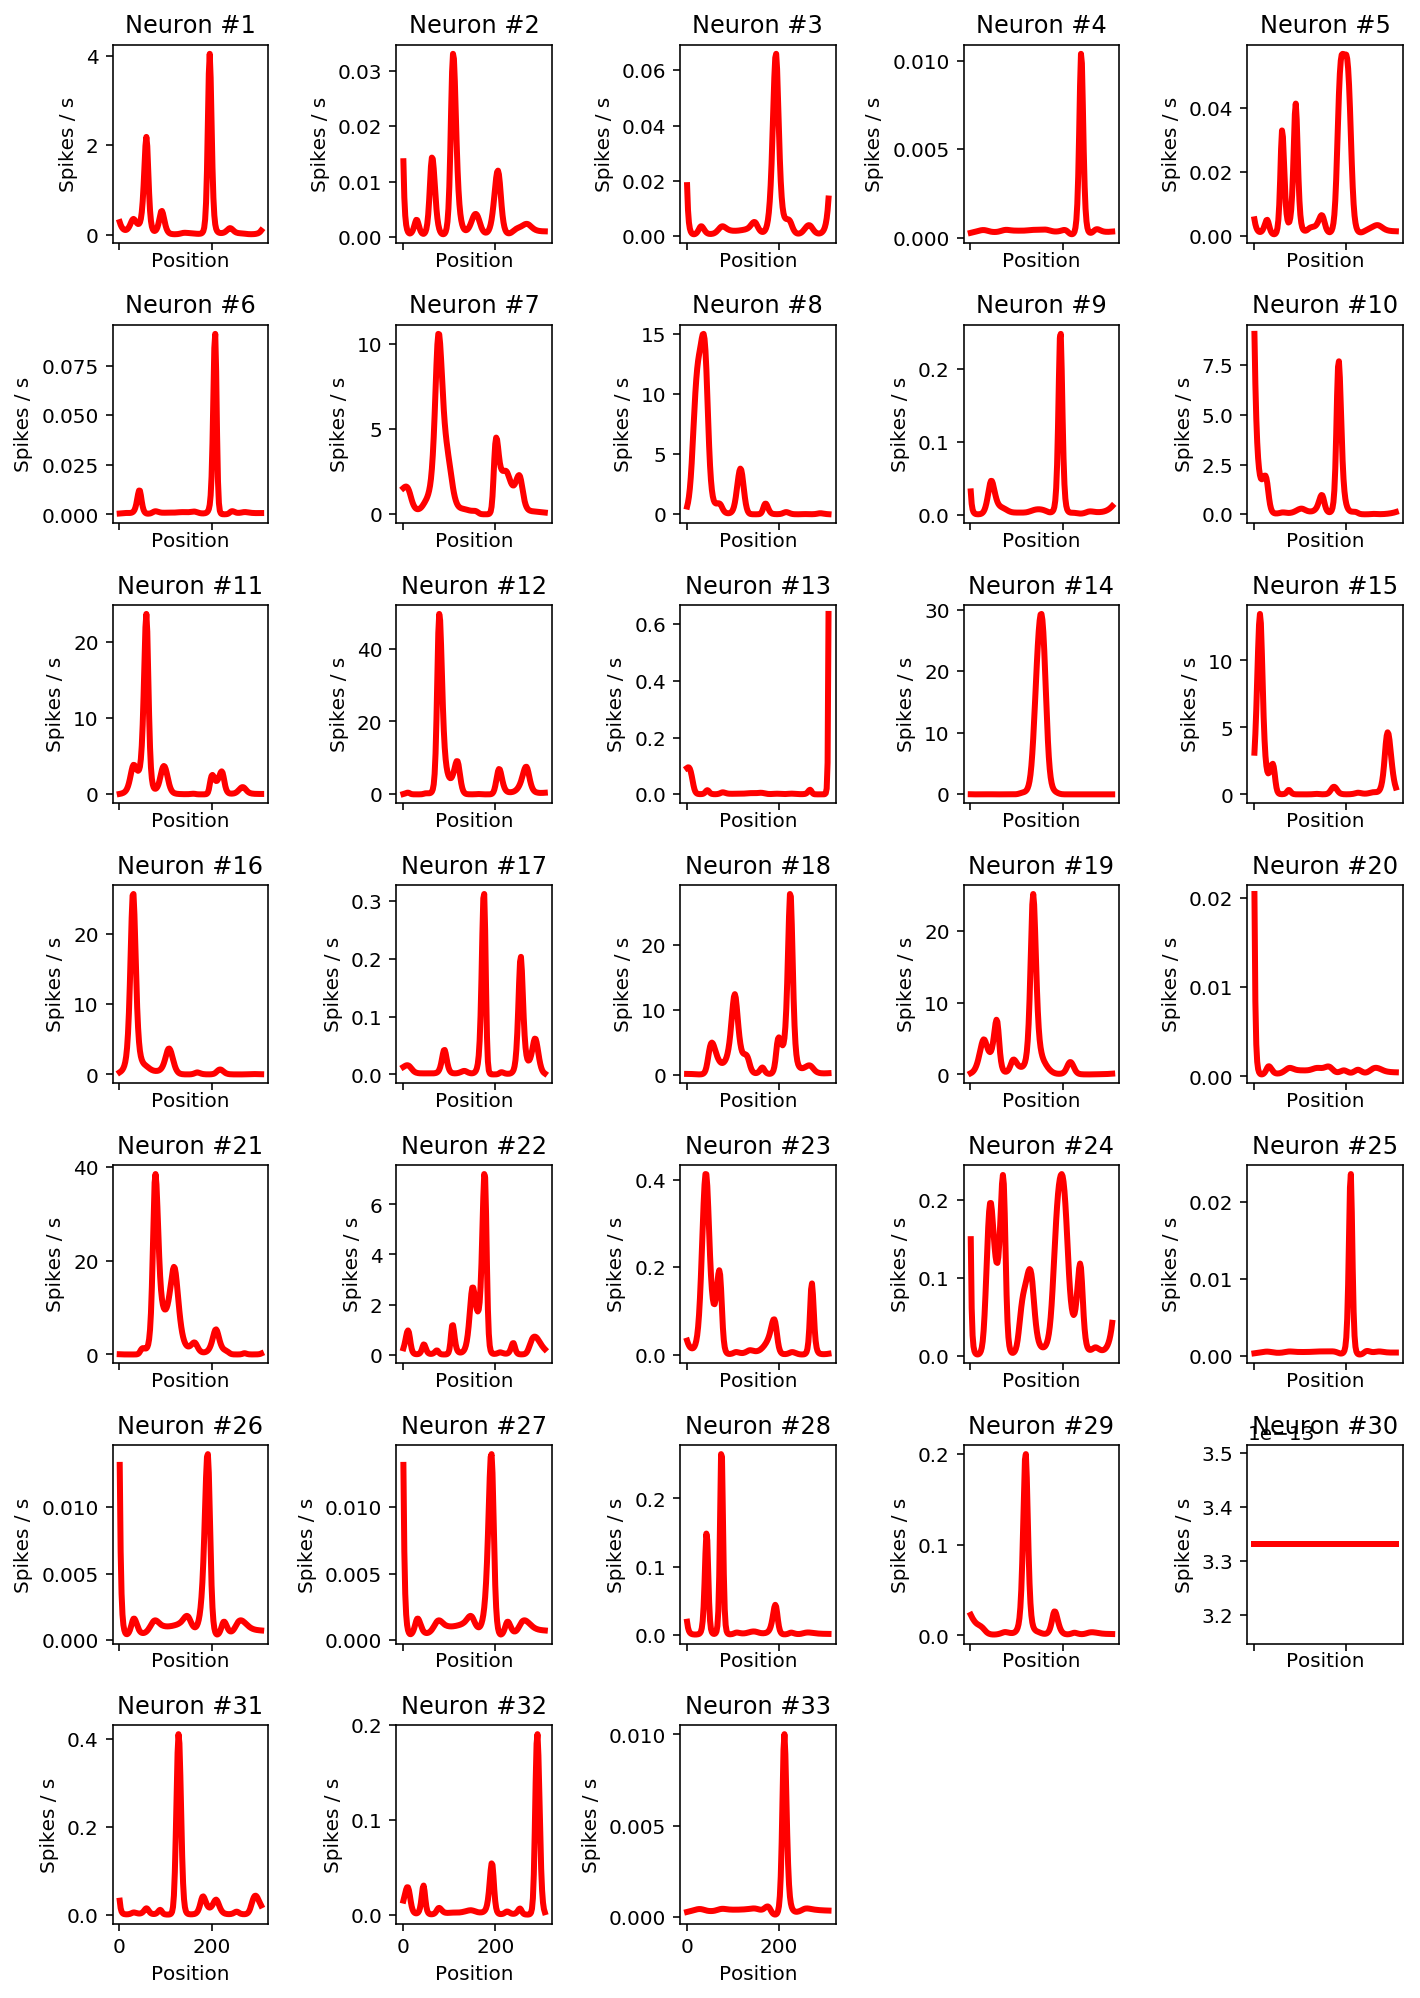

In [6]:
replay_detector.plot_fitted_place_fields(sampling_frequency=1500)

In [7]:
detector_results = replay_detector.predict(
    speed=data['position_info'][speed_metric],
    position=data['position_info'][position_metric],
    lfp_power=data['power'],
    spikes=data['spikes'],
    time=data['position_info'].index,
    use_likelihoods=['spikes'],
    use_smoother=True)

INFO:replay_identification.decoders:Predicting spikes likelihood...


INFO:replay_identification.decoders:Predicting replay probability and density...
INFO:replay_identification.decoders:Smoothing...


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
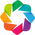

In [8]:
from src.summarize_replay import (add_epoch_info_to_dataframe, compare_overlap,
                                  decode_replays, get_replay_times,
                                  summarize_replays)

spikes_replay_info, spikes_is_replay = get_replay_times(detector_results)

In [10]:
import seaborn as sns

sns.set_context("talk", font_scale=1.05)

In [12]:
from src.visualization import plot_replay_with_data
from ipywidgets import interact

@interact(replay_number=(data['ripple_times'].index[0], data['ripple_times'].index[-1]))
def interactive(replay_number=1):
    plot_replay_with_data(replay_number, data, data['ripple_times'], epoch_key,
                          replay_detector, spikes_detector_results=detector_results,
                          show_data_types=['spikes', 'lfps'],
                          show_result_types=['ad_hoc_ripple', 'spikes'],
                          position_metric=position_metric);

interactive(children=(IntSlider(value=1, description='replay_number', max=349, min=1), Output()), _dom_classes…

In [15]:
from src.visualization import plot_replay_with_data
from ipywidgets import interact

@interact(replay_number=(spikes_replay_info.index[0], spikes_replay_info.index[-1]))
def interactive(replay_number=1):
    plot_replay_with_data(replay_number, data, spikes_replay_info, epoch_key,
                          replay_detector, spikes_detector_results=detector_results,
                          show_data_types=['spikes', 'lfps'],
                          show_result_types=['ad_hoc_ripple', 'spikes'],
                          position_metric=position_metric);

interactive(children=(IntSlider(value=1, description='replay_number', max=387, min=1), Output()), _dom_classes…

In [28]:
from src.visualization import plot_replay_with_data
from ipywidgets import interact

@interact(replay_number=(spikes_replay_info.index[0], spikes_replay_info.index[-1]))
def interactive(replay_number=1):
    plot_replay_with_data(replay_number, data, spikes_replay_info, epoch_key,
                          replay_detector, spikes_detector_results=detector_results,
                          show_data_types=['spikes', 'lfps', 'speed'],
                          show_result_types=['ad_hoc_ripple', 'spikes'],
                          position_metric=position_metric);

interactive(children=(IntSlider(value=1, description='replay_number', max=387, min=1), Output()), _dom_classes…

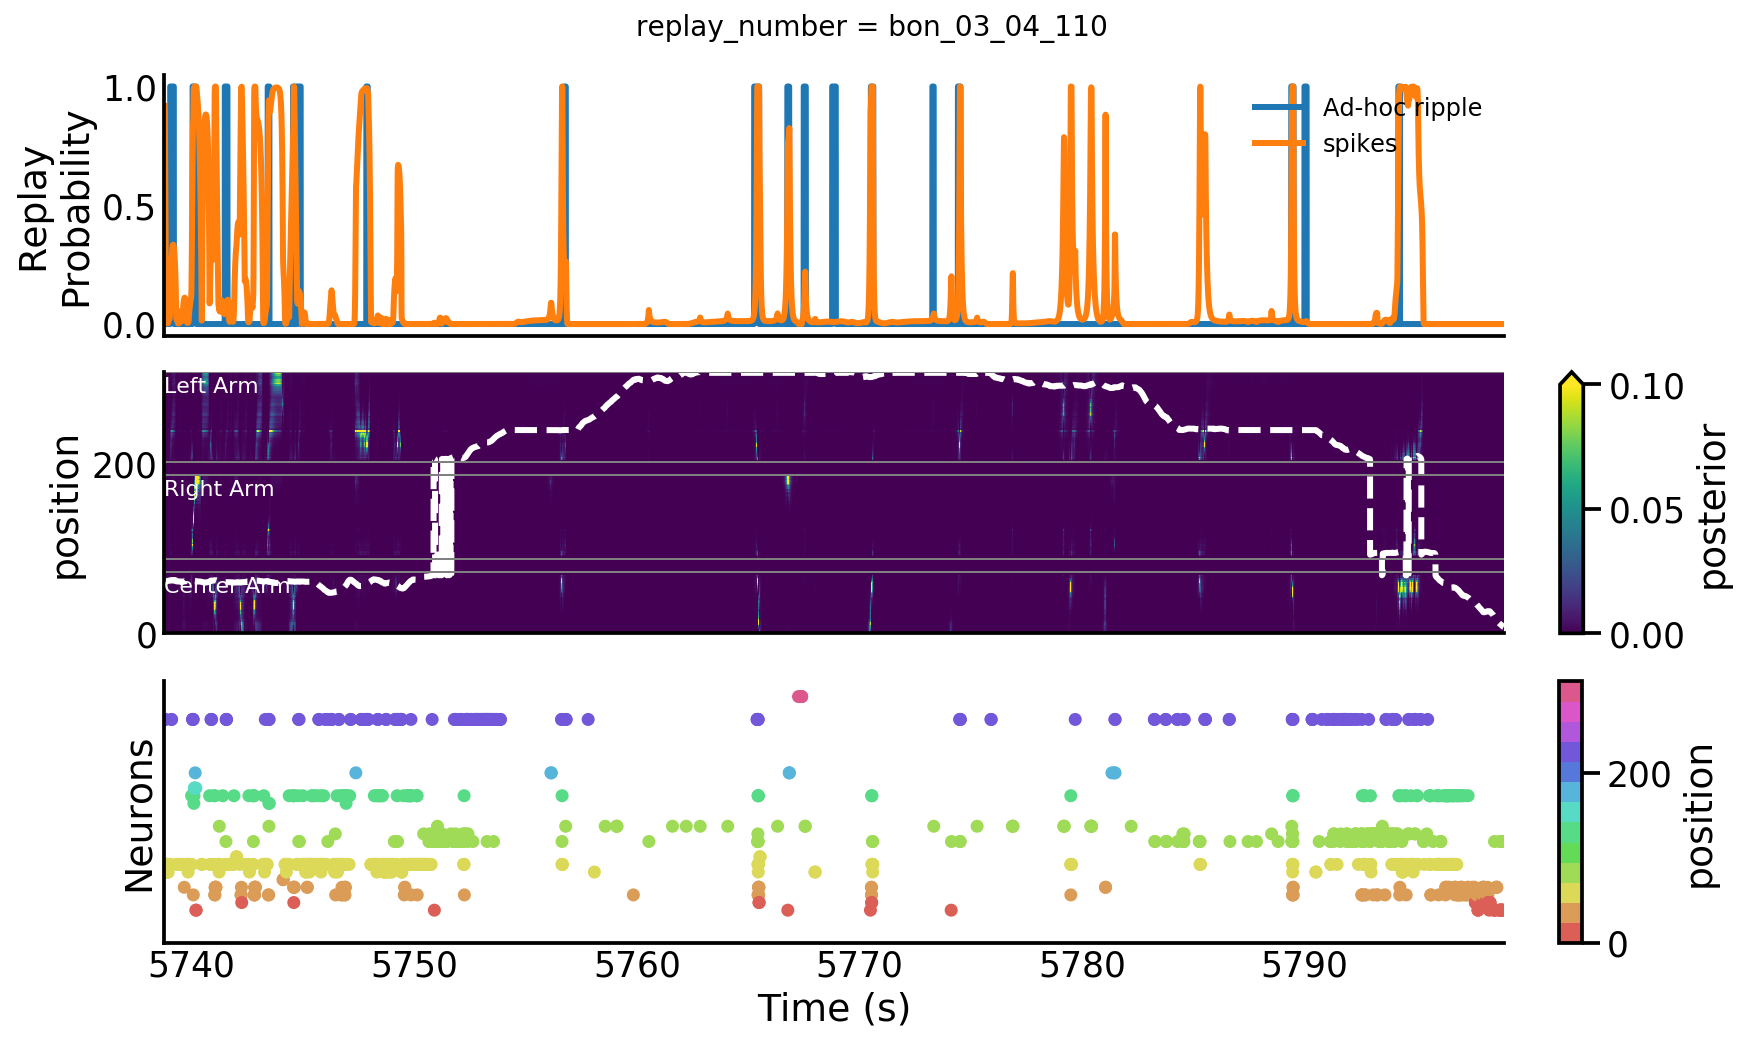

In [26]:
replay_number = 110

plot_replay_with_data(replay_number, data, data['ripple_times'], epoch_key,
                      replay_detector, spikes_detector_results=detector_results,
                      show_data_types=['spikes'],
                      show_result_types=['ad_hoc_ripple', 'spikes'],
                      position_metric=position_metric, offset=pd.Timedelta(30.00, 's'));

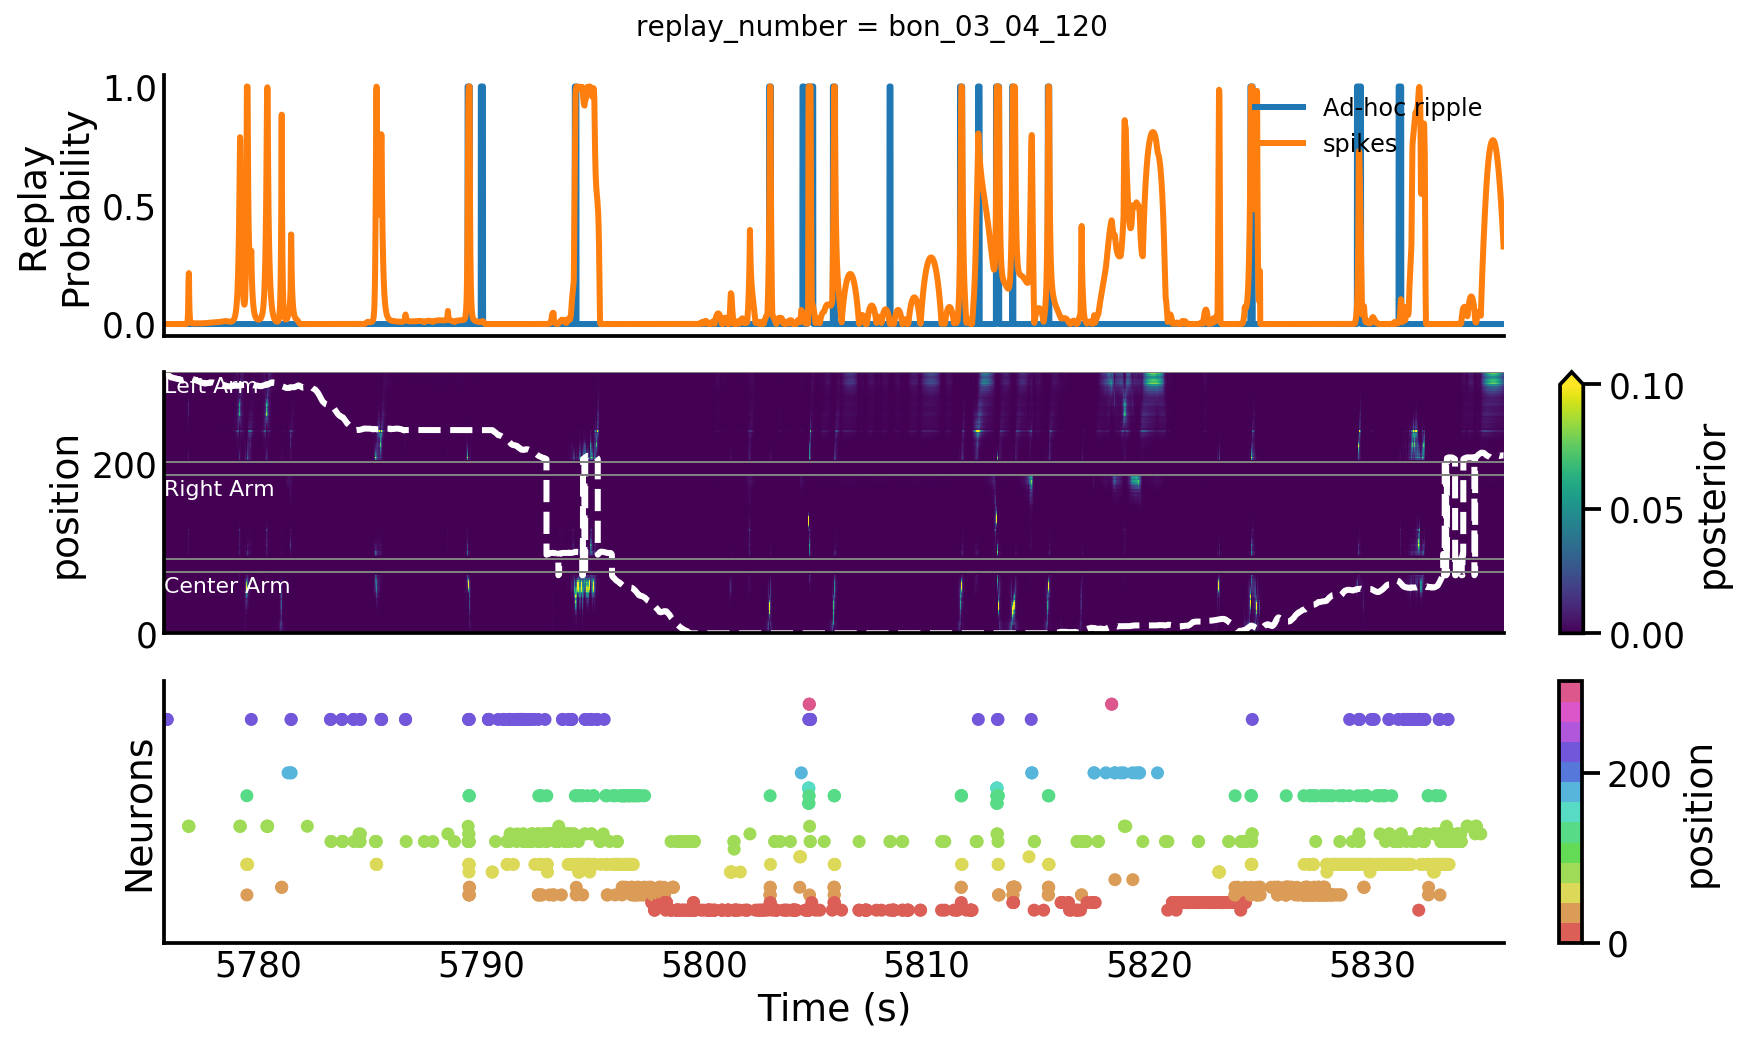

In [27]:
replay_number = 120

plot_replay_with_data(replay_number, data, data['ripple_times'], epoch_key,
                      replay_detector, spikes_detector_results=detector_results,
                      show_data_types=['spikes'],
                      show_result_types=['ad_hoc_ripple', 'spikes'],
                      position_metric=position_metric, offset=pd.Timedelta(30.00, 's'));